# Model training and cost function optimisation

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### Linear regression

##### The normal equation:  $\mathbf{\hat \theta=(X^TX)^{-1}X^Ty}$

In [5]:
X = 2*np.random.rand(100, 1)

In [6]:
y = 4 + 3*X + np.random.randn(100, 1)

Text(0, 0.5, 'y')

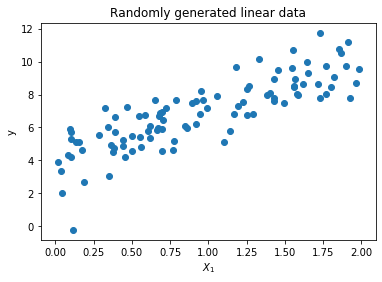

In [7]:
plt.scatter(X, y)
plt.title('Randomly generated linear data')
plt.xlabel(r'$X_1$')
plt.ylabel('y')

In [8]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
theta_best

array([[3.97503882],
       [3.05063079]])

In [10]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.97503882],
       [10.0763004 ]])

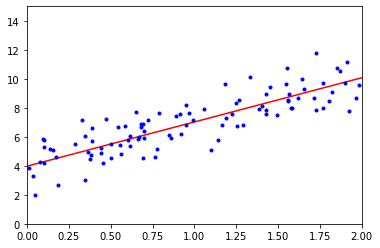

In [11]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [12]:
# Using sklearn

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.97503882]), array([[3.05063079]]))

In [15]:
lin_reg.predict(X_new)

array([[ 3.97503882],
       [10.0763004 ]])

In [16]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[3.97503882],
       [3.05063079]])

### Gradient descent

#### Batch gradient descent

##### Gradient vector: $ \nabla_\theta MSE(\mathbf{\theta}) = \begin{pmatrix} \frac{\partial}{\partial \theta_0}MSE(\mathbf{\theta}) \\ \frac{\partial}{\partial \theta_1}MSE(\mathbf{\theta}) \\ . \\ . \\ \frac{\partial}{\partial \theta_n}MSE(\mathbf{\theta}) \end{pmatrix} = \frac{2}{m}\mathbf{X}^T(\mathbf{X\theta-y)}$

##### Gradient descent step: $\mathbf{\theta}^{(\text{next step})} = \mathbf{\theta}-\eta\nabla_{\theta}MSE(\mathbf{\theta})$

In [17]:
eta = 0.1
n_iterations = 1000
m = 100

In [18]:

theta = np.random.randn(2, 1)

In [19]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [20]:
theta

array([[3.97503882],
       [3.05063079]])

#### Stochastic gradient descent

In [21]:
n_epochs = 50
t0, t1 = 5, 50

In [22]:
def learning_schedule(t):
    return t0/(t + t1)

In [23]:
theta = np.random.rand(2, 1)

In [24]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta*gradients

In [25]:
theta

array([[4.00572646],
       [3.0462667 ]])

### Regularized linear models

#### Ridge regression

##### Ridge regression cost function: $J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + \alpha \frac{1}{2} \sum_{i=1}^n{\theta_i}^2$

##### Ridge regression closed form solution (parameter estimation): $\mathbf{\hat \theta = (X^TX + \alpha A)^{-1}X^Ty}$, where $\mathbf{A}$ is the $(n+1)\times(n+1)$ identity matrix except with a $\mathbf{0}$ in the top left cell corresponding to the bias term

In [26]:
from sklearn.linear_model import Ridge

In [27]:
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [28]:
ridge_reg.predict([[1.5]])

array([[8.50220404]])

In [ ]:
# Use stochastic gradient descent

In [30]:
from sklearn.linear_model import SGDRegressor

In [31]:
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([8.65969349])

#### LASSO regression

##### LASSO regression cost function: $J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + \alpha \frac{1}{2} \sum_{i=1}^n \lvert \theta_i \rvert$

In [33]:
from sklearn.linear_model import Lasso

In [34]:
lasso_reg = Lasso(alpha = 0.1)

In [35]:
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
lasso_reg.predict([[1.5]])

array([8.38629175])

#### Elastic net

In [37]:
from sklearn.linear_model import ElasticNet

In [38]:
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)

In [39]:
elastic_net.fit(X, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
elastic_net.predict([[1.5]])

array([8.26087033])